In [8]:
from nilearn import input_data, datasets
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
path = os.path.join(cwd, '..', 'fMRI_Data', 'sub-001', 'func', 'sub-001_task-Training_run-01_bold.nii')
print(path)

# Load the Harvard-Oxford atlas
atlas_data = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# atlas_data.maps gives you the NIfTI image of labeled ROIs
labels_img = atlas_data.maps

# For example, create a masker to extract time series from functional images
masker = input_data.NiftiLabelsMasker(labels_img=labels_img, standardize=True, )
time_series = masker.fit_transform(path)
print(time_series.shape)
# print(time_series[0])

c:\EiT\EiT-Group5\AnalysisMethods\..\fMRI_Data\sub-001\func\sub-001_task-Training_run-01_bold.nii


c:\EiT\EiT-Group5\.venv\lib\site-packages\nilearn\maskers\nifti_labels_masker.py:625: UserWarning: After resampling the label image to the data image, the following labels were removed: {48}. Label image only contains 48 labels (including background).
  warnings.warn(


(410, 47)


c:\EiT\EiT-Group5\AnalysisMethods


(409, 4)


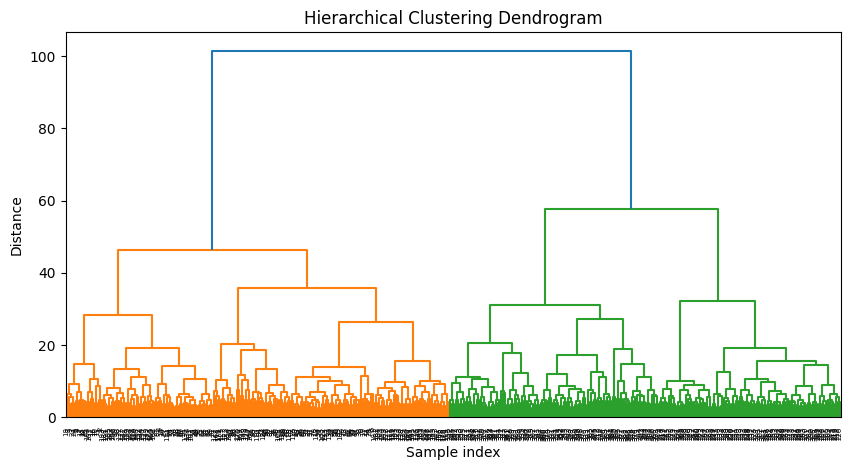

In [4]:

from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
Z = linkage(time_series, method='ward', metric='euclidean')
print(Z.shape)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()